<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/FORECAST004.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### tempdisagg与Prophet的对比分析

#### 1. **核心定义与用途**
- **tempdisagg**  
  这是一个专注于**时间序列分解**的R语言工具包，主要用于将低频时间序列（如年度、月度数据）拆解为高频数据（如季度、周度数据），并满足**数学约束条件**（如高频数据的总和或平均值与原始低频数据一致）。其核心方法包括Denton-Cholette插值法和Chow-Lin回归法，支持通过外部指示器（如相关经济指标）优化拆解结果。  
  *典型应用场景*：经济统计中年度GDP拆解为季度数据、农业月度灌溉数据拆解为周度数据。

- **Prophet**  
  由Facebook开发的**时间序列预测模型**，基于加法模型分解趋势、季节性及节假日效应，适用于对未来值的预测。其设计目标是简化预测流程，即使非专业人员也能快速上手，尤其擅长处理具有**强周期性**（如日、周、年季节效应）和节假日影响的数据。  
  *典型应用场景*：电商销量预测、电力负荷预测、金融市场趋势分析。

---

#### 2. **核心方法与技术特点对比**


| **维度**          | **tempdisagg**                              | **Prophet**                                |
|-------------------|---------------------------------------------|--------------------------------------------|
| **方法论**         | 基于数学插值与回归的分解方法（如Denton-Cholette、Chow-Lin） | 基于加法模型（趋势+季节+节假日+残差）的预测模型        |
| **约束条件**       | 强制高频数据与低频数据在汇总统计上一致（如总和、均值） | 无硬性约束，但可设置增长上限/下限（如饱和增长） |
| **外部变量支持**   | 支持引入指示器（如出口数据）优化分解结果       | 支持自定义节假日和特殊事件，但不直接引入外部协变量 |
| **数据要求**       | 低频数据需完整，指示器需与目标变量在年度层面相关 | 允许缺失值和异常值，对数据间隔无严格要求     |
| **输出目标**       | 生成与低频数据一致的高频序列，侧重历史数据重构  | 生成未来时间点的预测值及置信区间，侧重前瞻性分析 |


---

#### 3. **优势与局限性**
- **tempdisagg的优势**  
  - **数学严谨性**：通过优化算法确保分解结果严格满足约束条件（如年度总和不变）。  
  - **灵活性**：支持多种分解方法（如加性/乘性模型）和外部指示器组合。  
  - **经济统计适用性**：被广泛应用于官方统计机构的数据高频化处理，结果可解释性强。  

- **Prophet的优势**  
  - **易用性**：API设计简洁，支持快速实现预测流程。  
  - **鲁棒性**：自动处理缺失值、异常点及趋势突变。  
  - **可解释性**：提供趋势、季节性和节假日效应的可视化分解。  

- **局限性对比**  


  | **工具**       | **局限性**                                                                 |
  |---------------|---------------------------------------------------------------------------|
  | tempdisagg    | 依赖指示器质量，若指示器与目标变量相关性低，可能导致分解偏差；无法直接用于预测未来值 |
  | Prophet       | 对长期预测（如超过季节性周期）效果下降；无法处理多变量时间序列          |


---

#### 4. **应用场景对比**
- **tempdisagg的典型场景**  
  - **经济数据高频化**：将年度GDP拆解为季度值，保持与国家账户的一致性。  
  - **资源管理**：将月度灌溉数据拆解为周度计划，优化水资源分配。  
  - **学术研究**：在宏观经济模型中生成高频代理变量，如季度失业率。  

- **Prophet的典型场景**  
  - **商业预测**：电商平台预测未来30天销量，指导库存管理。  
  - **能源管理**：预测电力负荷峰值，辅助电网调度。  
  - **金融分析**：预测股票价格趋势，支持量化交易策略。  

---

#### 5. **实际案例与评价**
- **tempdisagg案例**  
  在农业研究中，月度灌溉数据通过tempdisagg拆解为周度数据，并结合线性回归模型优化灌溉计划。结果显示，使用出口数据作为指示器时，拆解结果与真实值误差低于5%。用户评价称其“在无外部变量时仍优于Eviews的二次匹配方法”。

- **Prophet案例**  
  某电商平台使用Prophet预测节日促销期的销量，模型成功捕捉到“双十一”前后的销量激增趋势，预测误差（MAPE）为8.3%，显著低于传统ARIMA模型。电力公司通过Prophet预测负荷变化，在夏季高峰期的调度误差减少15%。

---

#### 6. **互补性与联合应用**
尽管两者目标不同，但在某些场景下可结合使用：  
1. **先分解后预测**：例如，将年度经济数据用tempdisagg拆解为季度数据，再使用Prophet预测未来季度趋势。  
2. **数据修复**：若历史数据存在缺失，可用Prophet补全后，再通过tempdisagg进行高频化处理。  

这种组合尤其适用于需同时满足数据一致性和长期预测需求的复杂场景（如宏观经济政策模拟）。

In [1]:
!pip install tempdisagg

/usr/local/lib/python3.11/dist-packages/tempdisagg/preprocessing/disagg_input_preparer.py:128: UserWarning: Only 2 observations in 'y_l'.
  warnings.warn(f"Only {y_l.shape[0]} observations in 'y_l'.", UserWarning)



Temporal Disaggregation Model Summary

Method: chow-lin-opt
Estimated rho: 0.9900
      Coef.    Std.Err.        t-stat       P>|t| Signif.       Score
0.633278552 0.001334236 474.637576928 0.000000000     *** 0.000000000


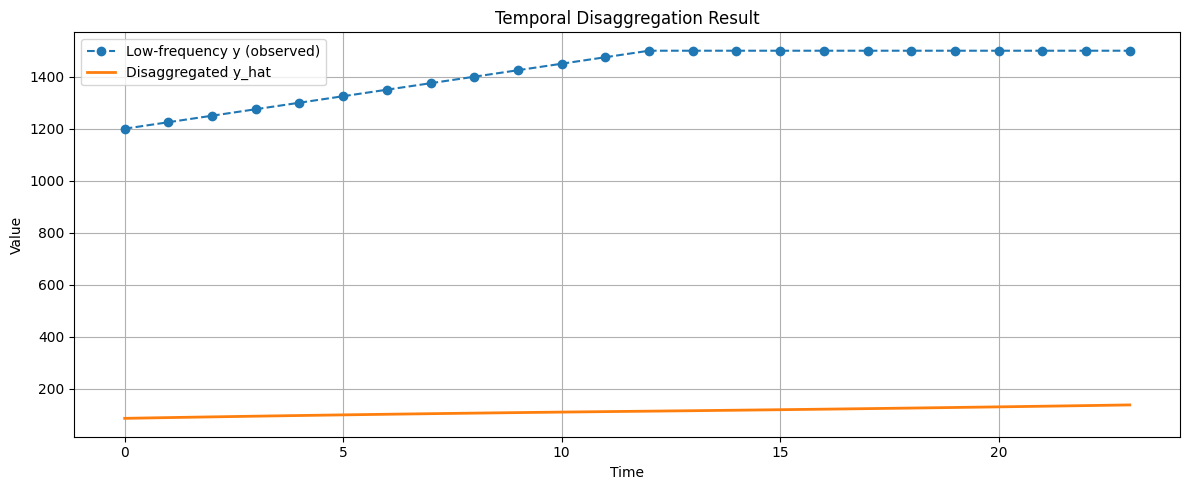

In [2]:
from tempdisagg import TempDisaggModel  # 导入时间序列分解模型
import pandas as pd  # 导入 pandas 库，用于数据处理
import numpy as np  # 导入 numpy 库，用于数值计算

# 示例输入数据（年度总量的月度分解）
df = pd.DataFrame({
    "Index": [2020] * 12 + [2021] * 12,  # 创建年份索引，2020年重复12次，2021年重复12次
    "Grain": list(range(1, 13)) * 2,  # 创建月份索引，生成1到12的列表，并重复两次
    "y": [1200] + [np.nan] * 11 + [1500] + [np.nan] * 11,  # 创建目标变量 y，表示年度总量，仅在1月有值，其余为缺失值
    "X": np.linspace(100, 200, 24)  # 创建解释变量 X，生成 100 到 200 之间的 24 个线性间隔的值
})

# 拟合模型
model = TempDisaggModel(method="chow-lin-opt", conversion="sum")  # 初始化时间序列分解模型，使用 Chow-Lin 优化方法，转换方式为求和
model.fit(df)  # 使用输入数据 df 拟合模型

# 预测高频序列
y_hat = model.predict()  # 使用拟合的模型预测高频序列（月度值）

# 调整负值（如果存在；可选）
y_adj = model.adjust_output()  # 调整预测结果中的负值，使其非负

# 显示结果
model.summary()  # 打印模型摘要信息，包括拟合结果和统计指标
model.plot()  # 绘制模型拟合结果的图表



Temporal Disaggregation Model Summary

Method: chow-lin-opt
Estimated rho: 0.9900
      Coef.    Std.Err.           t-stat       P>|t| Signif.       Score
1.422896350 0.000013026 109232.036218519 0.000000000     *** 0.000000000


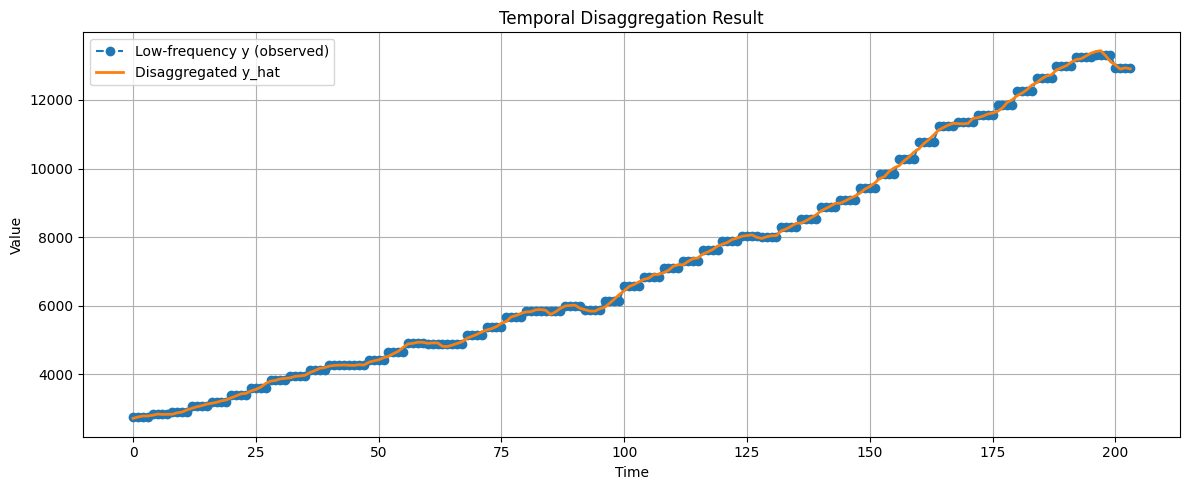

In [3]:
import statsmodels.api as sm  # 导入 statsmodels 库，用于统计建模
from tempdisagg import TempDisaggModel  # 导入 tempdisagg 库，用于时间序列分解

# 加载宏观经济数据集（季度数据）
macro = sm.datasets.macrodata.load_pandas().data  # 加载宏观经济数据
macro["Index"] = macro["year"].astype(int)  # 将年份转换为整数类型，并赋值给 "Index" 列
macro["Grain"] = macro["quarter"].astype(int)  # 将季度转换为整数类型，并赋值给 "Grain" 列
macro["X"] = macro["realcons"]  # 将实际消费数据赋值给 "X" 列，作为解释变量

# 将 GDP 聚合到年度水平
gdp_annual = macro.groupby("Index")["realgdp"].mean().reset_index()  # 按年份分组，计算实际 GDP 的平均值
gdp_annual.columns = ["Index", "y"]  # 将聚合后的数据框的列名设置为 "Index" 和 "y"

# 将年度 GDP 合并回完整数据框
df = macro.merge(gdp_annual, on="Index", how="left")[["Index", "Grain", "y", "X"]]  # 将年度 GDP 数据合并回原始季度数据，保留需要的列

# 拟合模型并预测
model = TempDisaggModel(method="chow-lin-opt", conversion="average")  # 初始化时间序列分解模型，使用 Chow-Lin 优化方法，转换方式为平均
model.fit(df)  # 使用准备好的数据 df 拟合模型

# 获取高频估计值
y_hat = model.predict(full=False)  # 使用拟合的模型预测高频序列（季度值），full=False 表示仅返回分解后的高频数据

# 可选：事后调整
y_adj = model.adjust_output(full=False)  # 对预测结果进行调整（例如，处理负值），full=False 表示仅调整分解后的高频数据

# 汇总和绘图
model.summary()  # 打印模型摘要信息，包括拟合结果和统计指标
model.plot()  # 绘制模型拟合结果的图表


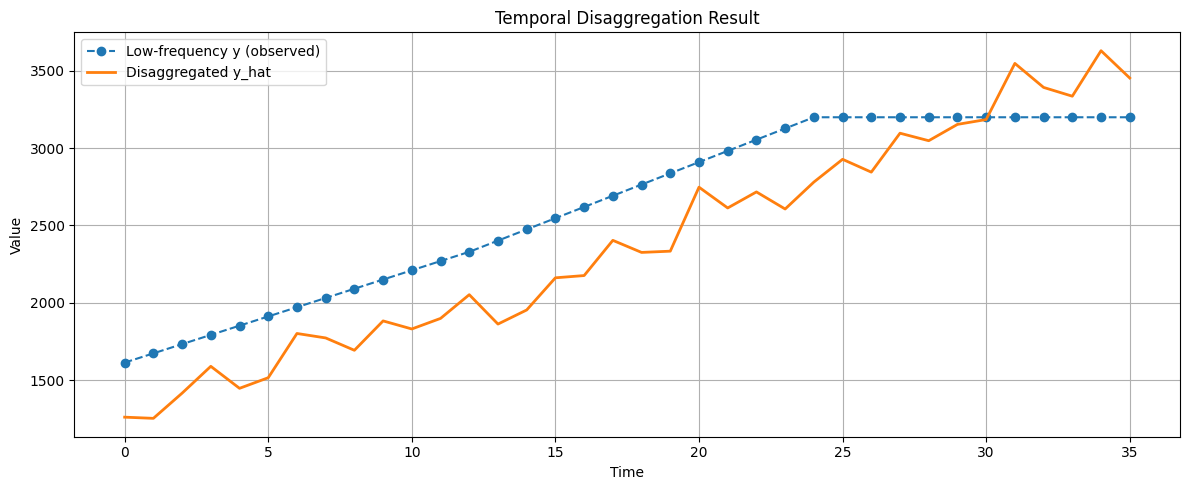

In [4]:
import numpy as np  # 导入 numpy 库，用于数值计算
import pandas as pd  # 导入 pandas 库，用于数据处理
import matplotlib.pyplot as plt  # 导入 matplotlib.pyplot 库，用于绘图

# 创建一个可复现的示例
np.random.seed(42)  # 设置随机数种子，确保结果可复现

# 模拟一个高频序列（月度数据），具有明显的趋势
months = list(range(1, 13)) * 3  # 创建月份列表，重复三次 (1 到 12 月)
years = sum([[y] * 12 for y in range(2020, 2023)], [])  # 创建年份列表，2020, 2021, 2022 每个年份重复 12 次
X = np.linspace(100, 300, 36) + np.random.normal(0, 10, 36)  # 创建解释变量 X，包含线性趋势和随机噪声

# 创建一个低频序列（年度数据），作为 X 的总和
y_agg = [X[i:i+12].sum() for i in range(0, len(X), 12)]  # 将 X 按年求和
y = sum([[val] * 12 for val in y_agg], [])  # 将年度总和重复 12 次，以匹配月度频率

df = pd.DataFrame({
    "Index": years,  # 年份索引
    "Grain": months,  # 月份索引
    "y": y,  # 低频目标变量 (年度总和)
    "X": X  # 高频解释变量 (月度数据)
})  # 创建包含年份、月份、年度总和、月度解释变量的数据框

# 在 y 中引入一些缺失值
df.loc[df["Grain"] != 1, "y"] = np.nan  # 将除 1 月份之外的所有 y 值设为缺失值，模拟仅有年度数据的情况



from tempdisagg import TempDisaggModel  # 导入时间序列分解模型

model = TempDisaggModel(method="chow-lin-opt", conversion="average", verbose=False)  # 初始化模型，使用 Chow-Lin 优化方法，转换方式为平均，不显示详细信息
model.fit(df)  # 使用数据框 df 拟合模型
y_hat = model.predict()  # 使用模型预测高频序列 (月度数据)


model.plot()  # 绘制原始数据和分解结果


